In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import os 

In [23]:
os.chdir(r'D:\good_stuff\cs_go')

In [24]:
players = pd.read_csv(r'data\players_feats.csv')
train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

In [4]:
train

,map_id,team1_id,team2_id,map_name,who_win
0,289,6665,7718,Ancient,0
1,715,4411,10577,Inferno,0
2,157,11251,9455,Nuke,1
3,524,4608,7532,Mirage,0
4,404,8637,6667,Overpass,1
...,...,...,...,...,...
708,709,6667,4773,Inferno,0
709,528,9215,5995,Ancient,1
710,163,4869,9565,Mirage,1
711,96,10426,4991,Nuke,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   map_id    713 non-null    int64 
 1   team1_id  713 non-null    int64 
 2   team2_id  713 non-null    int64 
 3   map_name  713 non-null    object
 4   who_win   713 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.0+ KB


In [6]:
players_rev = players[list(players.columns)[::-1]]
players_rev

,map_id,map_name,team_id,p5_first_kill_in_won_rounds,p5_team_win_percent_after_first_kill,p5_opening_kill_rating,p5_opening_kill_ratio,p5_total_opening_deaths,p5_total_opening_kills,p5_kill_death_difference,...,p1_kills_per_round,p1_rounds_played,p1_maps_played,p1_grenade_damage_per_round,p1_damage_per_round,p1_kd_ratio,p1_total_deaths,p1_headshots,p1_total_kills,p1_id
0,635,Ancient,6665,25.0,84.0,1.28,2.08,12,25,5,...,0.58,156,6,5.9,76.3,0.80,112,42.2,90,4954
1,635,Ancient,7532,16.7,70.4,1.17,1.59,34,54,96,...,0.66,68,3,10.9,82.3,0.79,57,60.0,45,5794
2,583,Dust2,6665,20.5,88.5,1.10,1.37,19,26,22,...,0.59,265,10,3.4,63.5,0.93,167,51.9,156,4954
3,583,Dust2,7532,17.4,79.0,1.10,1.27,49,62,104,...,0.73,618,23,13.1,86.7,1.05,427,53.5,449,5794
4,439,Dust2,4608,16.2,81.5,1.08,1.08,25,27,19,...,0.77,225,9,2.9,82.4,1.33,130,32.9,173,7998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,284,Ancient,10503,21.4,75.0,1.11,0.89,18,16,-1,...,0.61,114,4,5.7,69.8,0.99,70,49.3,69,9031
1482,27,Vertigo,7020,28.4,75.8,1.30,0.97,34,33,4,...,0.60,172,6,5.9,71.6,0.92,113,55.8,104,7716
1483,27,Vertigo,8297,4.3,55.6,0.77,0.60,15,9,5,...,0.67,210,8,7.4,79.7,0.89,159,37.6,141,12521
1484,237,Ancient,7020,22.9,83.3,1.39,1.76,17,30,35,...,0.63,246,10,7.9,71.1,1.01,154,58.7,155,7716


In [7]:
players_rev = players_rev.fillna(players_rev.median())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_36960\1207005469.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  players_rev = players_rev.fillna(players_rev.median())


In [8]:
merge_teams = players_rev.iloc[::2].merge(players_rev.iloc[1::2, ], on=['map_id', 'map_name'])
merge_teams.insert(3, 'team_id_y', merge_teams.pop('team_id_y'))
merge_teams

,map_id,map_name,team_id_x,team_id_y,p5_first_kill_in_won_rounds_x,p5_team_win_percent_after_first_kill_x,p5_opening_kill_rating_x,p5_opening_kill_ratio_x,p5_total_opening_deaths_x,p5_total_opening_kills_x,...,p1_kills_per_round_y,p1_rounds_played_y,p1_maps_played_y,p1_grenade_damage_per_round_y,p1_damage_per_round_y,p1_kd_ratio_y,p1_total_deaths_y,p1_headshots_y,p1_total_kills_y,p1_id_y
0,635,Ancient,6665,7532,25.0,84.0,1.28,2.08,12,25,...,0.66,68,3,10.9,82.3,0.79,57,60.0,45,5794
1,583,Dust2,6665,7532,20.5,88.5,1.10,1.37,19,26,...,0.73,618,23,13.1,86.7,1.05,427,53.5,449,5794
2,439,Dust2,4608,9215,16.2,81.5,1.08,1.08,25,27,...,0.65,110,5,3.1,63.7,1.29,55,47.9,71,11154
3,363,Mirage,5995,4411,0.0,0.0,0.00,0.00,0,0,...,0.56,296,12,3.1,63.6,0.82,203,42.2,166,8611
4,105,Mirage,4608,6665,16.9,88.1,0.99,0.84,50,42,...,0.52,249,9,4.4,66.1,0.77,169,54.6,130,4954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,357,Mirage,4608,6667,19.1,75.3,1.19,1.29,72,93,...,0.56,575,19,3.7,66.2,0.81,395,50.2,321,429
739,593,Nuke,4608,6667,8.5,82.4,0.80,0.63,27,17,...,0.61,395,16,3.4,71.8,0.91,263,46.2,240,429
740,284,Ancient,6665,10503,22.4,85.0,1.21,1.67,12,20,...,0.61,114,4,5.7,69.8,0.99,70,49.3,69,9031
741,27,Vertigo,7020,8297,28.4,75.8,1.30,0.97,34,33,...,0.67,210,8,7.4,79.7,0.89,159,37.6,141,12521


In [9]:
merge_teams['map_id'].nunique()

743

In [10]:
len(train['map_id'])

713

In [11]:
df_train = train.merge(merge_teams, on=['map_id', 'map_name'], how='inner')
df_test = test.merge(merge_teams, on=['map_id', 'map_name'], how='inner')
df_train

,map_id,team1_id,team2_id,map_name,who_win,team_id_x,team_id_y,p5_first_kill_in_won_rounds_x,p5_team_win_percent_after_first_kill_x,p5_opening_kill_rating_x,...,p1_kills_per_round_y,p1_rounds_played_y,p1_maps_played_y,p1_grenade_damage_per_round_y,p1_damage_per_round_y,p1_kd_ratio_y,p1_total_deaths_y,p1_headshots_y,p1_total_kills_y,p1_id_y
0,289,6665,7718,Ancient,0,6665,7718,19.7,83.6,1.18,...,0.69,183,7,4.8,71.7,1.08,117,46.0,126,8371
1,715,4411,10577,Inferno,0,4411,10577,16.3,74.5,1.01,...,0.63,836,32,2.8,67.2,1.00,525,53.0,523,8488
2,157,11251,9455,Nuke,1,11251,9455,5.0,81.8,0.73,...,0.60,337,13,4.5,69.0,0.93,215,39.8,201,557
3,524,4608,7532,Mirage,0,4608,7532,20.3,81.1,1.18,...,0.73,498,17,6.5,85.4,1.02,359,53.6,366,5794
4,404,8637,6667,Overpass,1,8637,6667,17.0,80.0,1.09,...,0.68,271,10,3.4,73.9,0.97,189,50.0,184,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,709,6667,4773,Inferno,0,6667,4773,10.3,68.9,1.00,...,0.60,413,16,8.6,69.8,0.95,262,53.0,249,6593
709,528,9215,5995,Ancient,1,9215,5995,24.0,60.0,1.30,...,0.53,127,5,1.5,57.6,0.87,77,59.7,67,284
710,163,4869,9565,Mirage,1,4869,9565,14.5,70.7,1.06,...,0.60,428,17,3.5,71.3,0.84,306,49.4,257,7322
711,96,10426,4991,Nuke,1,10426,4991,12.3,79.2,0.99,...,0.55,481,17,4.9,67.0,0.84,313,44.5,263,7528


In [12]:
sum(df_train['team1_id'] != df_train['team_id_x']), \
sum(df_train['team2_id'] != df_train['team_id_y']), \
sum(df_test['team1_id'] != df_test['team_id_x']), \
sum(df_test['team2_id'] != df_test['team_id_y'])

(0, 0, 0, 0)

In [13]:
df_train.drop(['team_id_x', 'team_id_y'], axis=1, inplace=True)
df_test.drop(['team_id_x', 'team_id_y'], axis=1, inplace=True)

In [14]:
player_id_list = []
for pl_id in df_train.columns[5:]:
    if '_id_' in pl_id:
        player_id_list.append(pl_id)
        
df_train.drop(player_id_list, axis = 1, inplace =True)
df_test.drop(player_id_list, axis = 1, inplace =True)

In [15]:
df_train

,map_id,team1_id,team2_id,map_name,who_win,p5_first_kill_in_won_rounds_x,p5_team_win_percent_after_first_kill_x,p5_opening_kill_rating_x,p5_opening_kill_ratio_x,p5_total_opening_deaths_x,...,p1_assists_per_round_y,p1_kills_per_round_y,p1_rounds_played_y,p1_maps_played_y,p1_grenade_damage_per_round_y,p1_damage_per_round_y,p1_kd_ratio_y,p1_total_deaths_y,p1_headshots_y,p1_total_kills_y
0,289,6665,7718,Ancient,0,19.7,83.6,1.18,1.67,33,...,0.13,0.69,183,7,4.8,71.7,1.08,117,46.0,126
1,715,4411,10577,Inferno,0,16.3,74.5,1.01,0.96,49,...,0.09,0.63,836,32,2.8,67.2,1.00,525,53.0,523
2,157,11251,9455,Nuke,1,5.0,81.8,0.73,0.52,21,...,0.14,0.60,337,13,4.5,69.0,0.93,215,39.8,201
3,524,4608,7532,Mirage,0,20.3,81.1,1.18,1.30,57,...,0.14,0.73,498,17,6.5,85.4,1.02,359,53.6,366
4,404,8637,6667,Overpass,1,17.0,80.0,1.09,1.18,17,...,0.13,0.68,271,10,3.4,73.9,0.97,189,50.0,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,709,6667,4773,Inferno,0,10.3,68.9,1.00,1.96,23,...,0.16,0.60,413,16,8.6,69.8,0.95,262,53.0,249
709,528,9215,5995,Ancient,1,24.0,60.0,1.30,1.11,9,...,0.12,0.53,127,5,1.5,57.6,0.87,77,59.7,67
710,163,4869,9565,Mirage,1,14.5,70.7,1.06,1.24,66,...,0.14,0.60,428,17,3.5,71.3,0.84,306,49.4,257
711,96,10426,4991,Nuke,1,12.3,79.2,0.99,1.04,23,...,0.14,0.55,481,17,4.9,67.0,0.84,313,44.5,263


## Forecasting

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn. metrics import plot_roc_curve

In [17]:
def avg_metrics_by_team(df, avg_by='mean'):
    final_df = pd.DataFrame(index=list(df.index))
    for column in df.columns[:5]:
        final_df = final_df.join(df[column])
    for x in range(5, 29):
        avg_metric = df.iloc[:, x:125:24].agg(avg_by, axis=1) \
            .rename(f'{avg_by}_' + df.columns[x][3:])
        final_df = final_df.join(avg_metric)
    
    for x in range(125, 149):
        avg_metric = df.iloc[:, x:245:24].agg(avg_by, axis=1) \
            .rename(f'{avg_by}_' + df.columns[x][3:])
        final_df = final_df.join(avg_metric)
    return final_df

In [18]:
avg_by_team_df = avg_metrics_by_team(df_train, avg_by='mean')
avg_by_team_df.shape

(713, 53)

In [19]:
X_data = avg_by_team_df.iloc[:-30, 5:]
y_data =  avg_by_team_df['who_win'][:-30]
X_validate = avg_by_team_df.iloc[-30:, 5:]
y_validate =  avg_by_team_df['who_win'][-30:]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y_data, 
                                                    test_size=0.1,
                                                    random_state=42)


In [25]:
# param_grid = [{
#     'penalty': ['l2', 'none'],
#     'C': np.logspace(-4, 6, 20),
#     'solver': ['sag', 'saga'],
#     'max_iter': [1000, 2500, 5000]
# }]

# clf = RandomizedSearchCV(logr,
#                          param_distributions=param_grid, 
#                          cv=7, verbose= True, n_jobs=-1,
#                          return_train_score=True, random_state=42)

# best_clf = clf.fit(X_train, y_train)
# best_clf.best_estimator_

logr = linear_model.LogisticRegression(C=0.0001, max_iter=5000, solver='saga').fit(X_train, y_train)



In [26]:

# Test
test_predicted = logr.predict(X_test)
test_predicted_proba = logr.predict_proba(X_test)
test_predicted_calibr = [int(elem) for elem in test_predicted_proba[:, 1] >= 0.47]

# Validate
validate_predict = logr.predict(X_validate)
val_predicted_proba = logr.predict_proba(X_validate)
val_predicted_calibr = [int(elem) for elem in val_predicted_proba[:, 1] >= 0.47]

In [27]:
print ('Test data without calibr:')
print(f'Accuracy - {accuracy_score(y_test, test_predicted)}, roc_auc - {roc_auc_score(y_test, test_predicted)}.')
print ('Test data with calibr:')
print(f'Accuracy - {accuracy_score( y_test, test_predicted_calibr)}, roc_auc - {roc_auc_score(y_test, test_predicted_calibr)}.')
print()
print ('Validate data without calibr:')
print(f'Accuracy - {accuracy_score( y_validate, validate_predict)}, roc_auc - {roc_auc_score( y_validate, validate_predict)}.')
print ('Validate data with calibr:')
print(f'Accuracy - {accuracy_score(y_validate, val_predicted_calibr)}, roc_auc - {roc_auc_score(y_validate, val_predicted_calibr)}.')

Test data without calibr:
Accuracy - 0.6811594202898551, roc_auc - 0.7016129032258064.
Test data with calibr:
Accuracy - 0.7101449275362319, roc_auc - 0.7219864176570459.

Validate data without calibr:
Accuracy - 0.6666666666666666, roc_auc - 0.6666666666666667.
Validate data with calibr:
Accuracy - 0.6333333333333333, roc_auc - 0.6333333333333334.


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


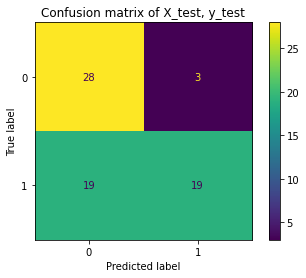

In [28]:

plot_confusion_matrix(logr, X_test, y_test, )
plt.title('Confusion matrix of X_test, y_test');

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


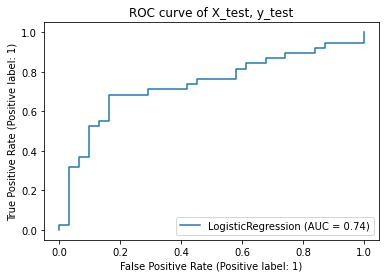

In [29]:

plot_roc_curve(logr, X_test, y_test, )
plt.title('ROC curve of X_test, y_test');

## Test forecasting

In [30]:
df_test

,index,map_id,team1_id,team2_id,map_name,p5_first_kill_in_won_rounds_x,p5_team_win_percent_after_first_kill_x,p5_opening_kill_rating_x,p5_opening_kill_ratio_x,p5_total_opening_deaths_x,...,p1_assists_per_round_y,p1_kills_per_round_y,p1_rounds_played_y,p1_maps_played_y,p1_grenade_damage_per_round_y,p1_damage_per_round_y,p1_kd_ratio_y,p1_total_deaths_y,p1_headshots_y,p1_total_kills_y
0,713,309,5973,5752,Dust2,22.5,76.5,1.27,1.38,37,...,0.14,0.77,286,12,7.4,82.2,1.19,184,52.5,219
1,714,541,5973,5752,Vertigo,14.3,50.0,1.02,0.73,33,...,0.16,0.69,289,10,7.6,76.5,1.08,184,40.4,198
2,715,1,8297,7020,Nuke,11.8,76.9,0.86,0.79,33,...,0.09,0.69,334,13,4.0,70.6,1.11,208,51.9,231
3,716,392,8297,7020,Mirage,9.5,75.0,0.86,0.88,32,...,0.11,0.64,380,14,2.1,71.1,0.94,260,58.2,244
4,717,684,8297,7020,Overpass,10.3,78.6,0.85,0.67,21,...,0.11,0.66,297,11,3.3,71.6,1.08,182,55.8,197
5,718,85,4494,4411,Vertigo,11.4,87.5,0.87,0.84,19,...,0.08,0.55,333,12,8.0,61.3,0.86,212,31.3,182
6,719,314,4494,4411,Inferno,9.4,68.0,0.93,1.79,14,...,0.09,0.60,348,13,4.4,60.6,1.00,209,29.2,209
7,720,403,4494,4411,Mirage,14.8,82.9,0.95,0.92,38,...,0.11,0.63,320,12,4.6,67.1,1.06,191,29.2,202
8,721,125,4608,7718,Inferno,11.2,70.0,0.93,0.83,36,...,0.17,0.67,427,16,7.7,77.4,1.00,284,53.9,284
9,722,241,4608,7718,Mirage,18.4,75.3,1.18,1.31,62,...,0.13,0.67,408,15,4.5,75.6,1.03,265,47.3,273


In [31]:
avg_test = avg_metrics_by_team(df_test, avg_by='mean').iloc[:, 5:]
avg_test.shape

(30, 48)

In [32]:
final_prediction = pd.DataFrame(logr.predict(avg_test)).rename(columns={0:'test_prediction'})
final_prediction

,test_prediction
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
final_prediction.to_csv('test_prediction.csv')